<img src = "./resources/images/banner_3.jpeg" alt = "Encabezado MLDS" width = "100%">  </img>


# **Preparación de los datos**
---

## **0. Integrantes del equipo de trabajo**
---

<table><thead>
  <tr>
    <th>#</th>
    <th>Integrante</th>
    <th>Documento de identidad</th>
  </tr></thead>
<tbody>
  <tr>
    <td>1</td>
    <td>Diego Alejandro Feliciano Ramos</td>
    <td>1024586904</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Ivonne Cristina Ruiz Páez</td>
    <td>1014302058</td>
  </tr>
</tbody>
</table>

## **1. Limpieza de los Datos**
---

La elección de las técnicas de preprocesamiento puede diferir en cada conjunto de datos. Recuerde que es posible aplicar, según sea necesario (no necesariamente todas), las técnicas generales que se han explorado en el curso. La elección dependerá del tipo de datos con el que esté trabajando.

A lo largo de esta entrega, busque responder las siguientes preguntas:

- ¿Cuáles fueron los criterios utilizados para identificar y tratar valores atípicos, datos faltantes o cualquier otra anomalía en el conjunto de datos durante el proceso de limpieza?
- ¿Cómo se justificaría la necesidad de cada paso de preprocesamiento en términos de mejora de la calidad de los datos y preparación para el análisis subsiguiente?

A continuación encontrará los puntos a tratar a medida que va realizando la preparación de los datos. En cada punto defina el estado en que se encontraba el dataset, ademas de explicar y justificar las acciones y decisiones que se tomaron.

In [1]:
#Carga de datos
%pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e75ab062e832e9d4634b91c68751fcfcd42e3fa4152c4a0342a19fb0904f2498
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [4]:
from medmnist import PneumoniaMNIST

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimage import measure, data, morphology, filters, color, feature
from scipy import signal

import matplotlib.pyplot as plt

In [5]:
train_set = PneumoniaMNIST(split="train", download=True)
val_set = PneumoniaMNIST(split="val", download=True)
test_set = PneumoniaMNIST(split="test", download=True)

100%|██████████| 4.17M/4.17M [00:01<00:00, 3.88MB/s]


Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist.npz


Debido a la naturaleza de los datos, la obtención entre otros factores se entiende que la única etapa crucial en la preparación y limpieza de los datos será la etapa de selección, la cuál se describirá en la siguiente sección.

### **1.1 Selección de datos**
---

Dado el conjunto de datos a utilizar, que consiste en imágenes (datos no estructurados), se busca describir el conjunto de datos utilizando extracción de características para obtener una representación útil que facilite la identificación de patrones relevantes para la tarea en cuestión  y así obtener una representación reducida y descriptiva del conjunto de datos para el desarrollo de algoritmos de aprendizaje automático.

A continuación, se presentan algunas de estas herramientas aplicadas al conjunto de datos.

**1.1.1 Umbralización**


Es una técnica de procesamiento de imágenes que convierte una imagen en escala de grises en una imagen binaria. Esto se logra estableciendo un valor de umbral; los píxeles que superan este valor se establecen en blanco (255) y los que no lo alcanzan se establecen en negro (0). En este caso el valor de umbral es 127, el valor máximo (255 para blanco), y el tipo de umbralización (THRESH_BINARY). Esto ayuda a segmentar objetos o características específicas en la imagen.

**1.1.2 Ecualización del Histograma**

Es un método que mejora el contraste de una imagen al distribuir sus valores de píxeles de manera más uniforme. Este proceso es útil en imágenes con iluminación no uniforme y puede ayudar a resaltar características que son difíciles de ver en la imagen original. Produce una nueva imagen donde los niveles de gris están distribuidos uniformemente, mejorando así el contraste. Esto puede facilitar la identificación de características importantes en la imagen que de otro modo podrían estar ocultas.

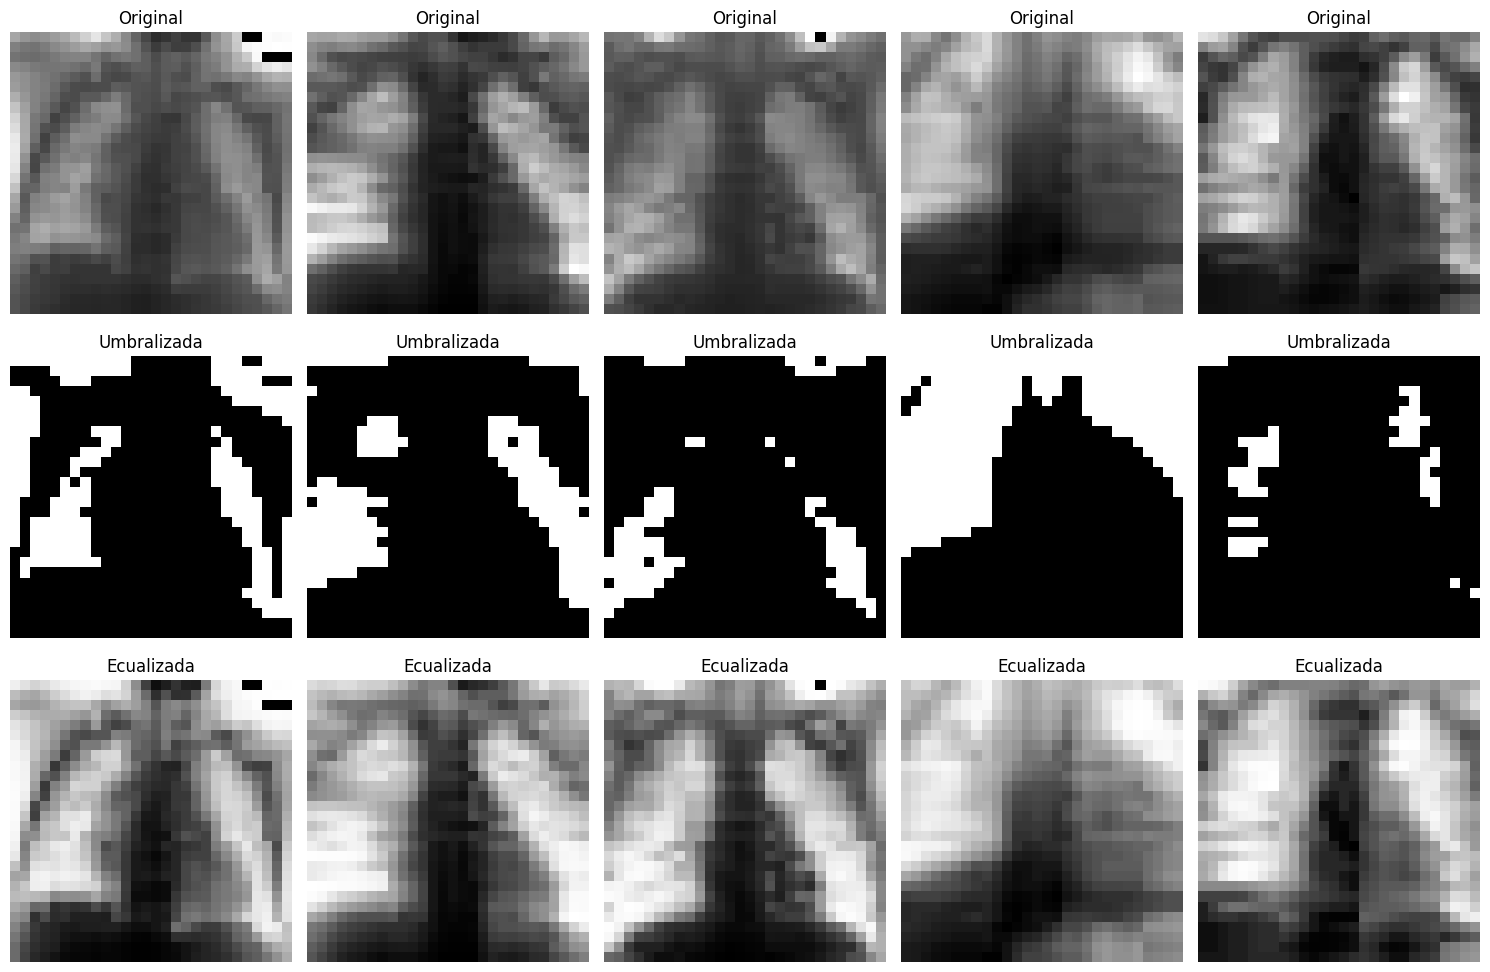

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import PneumoniaMNIST

# Función para aplicar umbralización
def umbralizacion(imagen):
    _, img_umbralizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
    return img_umbralizada

# Función para aplicar equalización del histograma
def igualacion_histograma(imagen):
    img_eq = cv2.equalizeHist(imagen)
    return img_eq

# Procesar el conjunto de datos
def procesar_imagenes(dataset):
    imagenes_procesadas = []
    imagenes_originales = []

    for img, _ in dataset:
        img = np.array(img)
        img = img.squeeze()
        img = (img * 255).astype(np.uint8)

        # Almacenar la imagen original
        imagenes_originales.append(img)

        # Aplicar umbralización
        img_umbralizada = umbralizacion(img)

        # Aplicar equalización del histograma
        img_eq = igualacion_histograma(img)

        # Almacenar las imágenes procesadas
        imagenes_procesadas.append((img_umbralizada, img_eq))

    return imagenes_originales, imagenes_procesadas

# Procesar las imágenes del conjunto de entrenamiento
imagenes_originales_train, imagenes_procesadas_train = procesar_imagenes(train_set)

# Mostrar algunas imágenes originales, umbralizadas y ecualizadas
plt.figure(figsize=(15, 10))
for i in range(5):
    # Imagen original
    plt.subplot(3, 5, i + 1)
    plt.imshow(imagenes_originales_train[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Imagen umbralizada
    plt.subplot(3, 5, i + 6)
    plt.imshow(imagenes_procesadas_train[i][0], cmap='gray')
    plt.title('Umbralizada')
    plt.axis('off')

    # Imagen ecualizada
    plt.subplot(3, 5, i + 11)
    plt.imshow(imagenes_procesadas_train[i][1], cmap='gray')
    plt.title('Ecualizada')
    plt.axis('off')

plt.tight_layout()
plt.show()


## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*